<a href="https://colab.research.google.com/github/Ishtiana/vending_machine_sales/blob/main/vending_machine_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [268]:
machine_data = pd.read_csv('/content/vending_machine_sales.csv')

In [269]:
machine_data.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [270]:
machine_data.shape

(9617, 18)

In [271]:
machine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9617 non-null   object 
 1   Device ID    9617 non-null   object 
 2   Location     9617 non-null   object 
 3   Machine      9617 non-null   object 
 4   Product      9611 non-null   object 
 5   Category     9350 non-null   object 
 6   Transaction  9617 non-null   int64  
 7   TransDate    9617 non-null   object 
 8   Type         9617 non-null   object 
 9   RCoil        9617 non-null   int64  
 10  RPrice       9617 non-null   float64
 11  RQty         9617 non-null   int64  
 12  MCoil        9617 non-null   int64  
 13  MPrice       9614 non-null   float64
 14  MQty         9617 non-null   int64  
 15  LineTotal    9617 non-null   float64
 16  TransTotal   9617 non-null   float64
 17  Prcd Date    9617 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

In [272]:
machine_data.isnull().sum()

Status           0
Device ID        0
Location         0
Machine          0
Product          6
Category       267
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           3
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
dtype: int64

In [273]:
machine_data['MPrice'].mean()

1.9583940087372582

In [274]:
machine_data['MPrice'].fillna(machine_data['MPrice'].mean(), inplace=True)

In [275]:
machine_data['Product'].mode()

0    Coca Cola - Zero Sugar
Name: Product, dtype: object

In [276]:
mode_of_Product = machine_data.pivot_table(values='Product', columns='Location', aggfunc=(lambda x: x.mode()[0]))

In [277]:
print(mode_of_Product)

Location     Brunswick Sq Mall       EB Public Library  \
Product   Poland Springs Water  Coca Cola - Zero Sugar   

Location                                  Earle Asphalt  \
Product   Robert Irvine's - Fit Crunch -  Chocolate Pea   

Location              GuttenPlans  
Product   Monster Energy Original  


In [278]:
miss_values = machine_data['Product'].isnull()

In [279]:
print(miss_values)

0       False
1       False
2       False
3       False
4       False
        ...  
9612    False
9613    False
9614    False
9615    False
9616    False
Name: Product, Length: 9617, dtype: bool


In [280]:
machine_data.loc[miss_values, 'Product'] = machine_data.loc[miss_values,'Location'].apply(lambda x: mode_of_Product[x])

In [281]:
machine_data.isnull().sum()

Status           0
Device ID        0
Location         0
Machine          0
Product          0
Category       267
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           0
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
dtype: int64

In [282]:
machine_data['Category'].mode()

0    Food
Name: Category, dtype: object

In [283]:
mode_of_Category = machine_data.pivot_table(values='Category', columns='Location', aggfunc=(lambda x: x.mode()[0]))

In [284]:
print(mode_of_Category)

Location Brunswick Sq Mall EB Public Library Earle Asphalt GuttenPlans
Category              Food              Food          Food        Food


In [285]:
miss_values = machine_data['Category'].isnull()

In [286]:
print(miss_values)

0       False
1       False
2       False
3       False
4       False
        ...  
9612    False
9613    False
9614    False
9615    False
9616    False
Name: Category, Length: 9617, dtype: bool


In [287]:

machine_data.loc[miss_values, 'Category'] = machine_data.loc[miss_values,'Location'].apply(lambda x: mode_of_Category[x])

In [288]:
machine_data.isnull().sum()

Status         0
Device ID      0
Location       0
Machine        0
Product        0
Category       0
Transaction    0
TransDate      0
Type           0
RCoil          0
RPrice         0
RQty           0
MCoil          0
MPrice         0
MQty           0
LineTotal      0
TransTotal     0
Prcd Date      0
dtype: int64

In [289]:
machine_data.describe()

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
count,9.617000e+03,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000
mean,1.538223e+10,132.982011,1.958251,1.014766,132.982011,1.958394,1.014766,1.985520,2.220469
std,4.403263e+08,13.356722,0.698608,0.127330,13.356722,0.698561,0.127330,0.744244,1.084523
min,1.451578e+10,110.000000,1.000000,1.000000,110.000000,1.000000,1.000000,1.000000,1.000000
25%,1.503952e+10,122.000000,1.500000,1.000000,122.000000,1.500000,1.000000,1.500000,1.500000
50%,1.538346e+10,138.000000,1.500000,1.000000,138.000000,1.500000,1.000000,1.500000,2.000000
75%,1.573892e+10,144.000000,2.500000,1.000000,144.000000,2.500000,1.000000,2.500000,2.750000
max,1.617733e+10,165.000000,5.000000,3.000000,165.000000,5.000000,3.000000,8.000000,9.000000


Numerical Feature

In [290]:
sns.set()

<ipython-input-291-f836a5a61bec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(machine_data['MQty'])


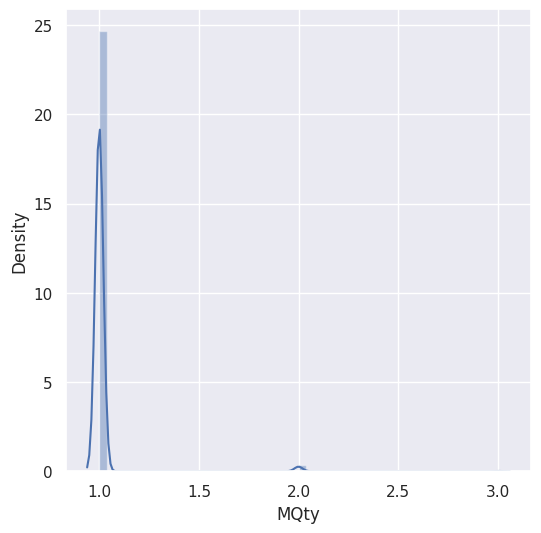

In [291]:
# Mprice distribution
plt.figure(figsize=(6,6))
sns.distplot(machine_data['MQty'])
plt.show()

<ipython-input-292-82104f34e0de>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(machine_data['RQty'])


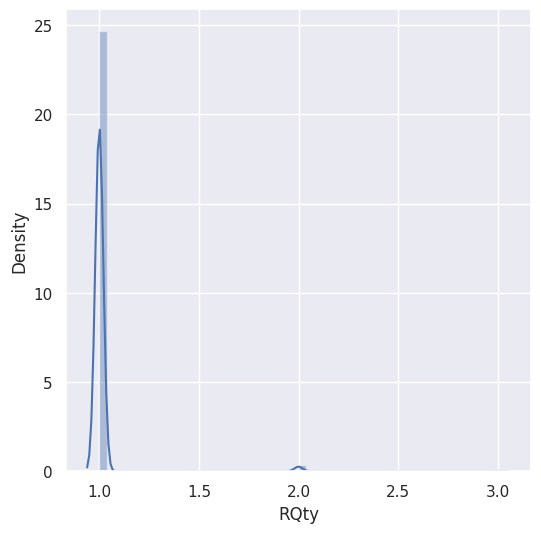

In [292]:
# Item RQty distribution
plt.figure(figsize=(6,6))
sns.distplot(machine_data['RQty'])
plt.show()

<ipython-input-293-cb9809024e86>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(machine_data['RCoil'])


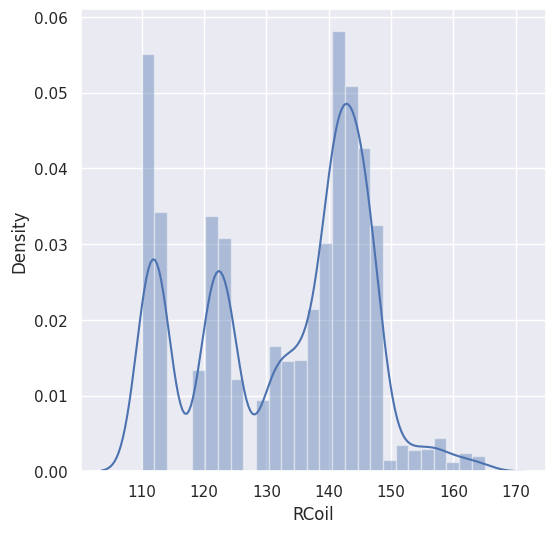

In [293]:
# Item RCoil distribution
plt.figure(figsize=(6,6))
sns.distplot(machine_data['RCoil'])
plt.show()

<ipython-input-294-dfb9bc298049>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(machine_data['RPrice'])


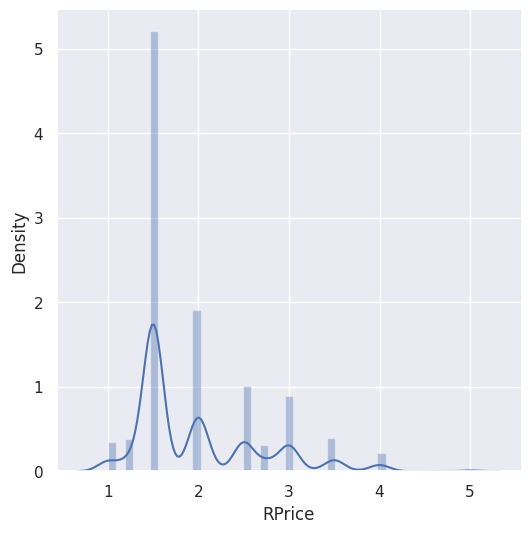

In [294]:
# Item RPrice distribution
plt.figure(figsize=(6,6))
sns.distplot(machine_data['RPrice'])
plt.show()

<ipython-input-295-25d7386b9389>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(machine_data['MPrice'])


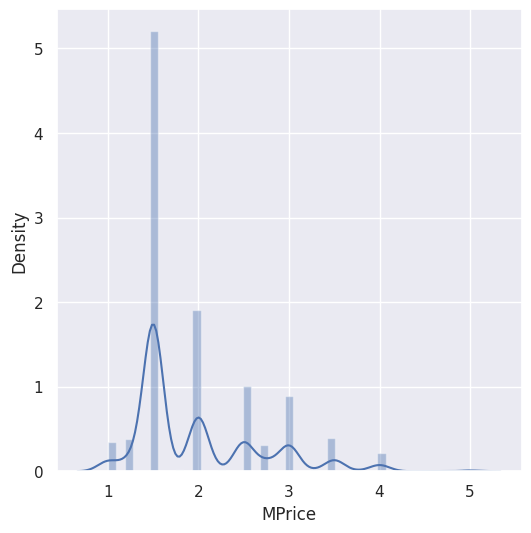

In [295]:
# Item MPrice distribution
plt.figure(figsize=(6,6))
sns.distplot(machine_data['MPrice'])
plt.show()

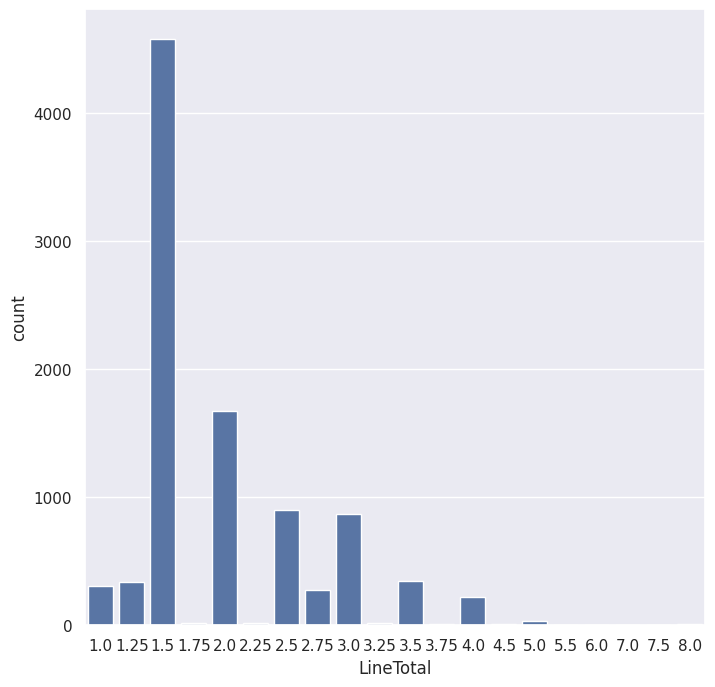

In [296]:
# LineTotal
plt.figure(figsize=(8,8))
sns.countplot(x='LineTotal', data=machine_data)
plt.show()


Categorical Features


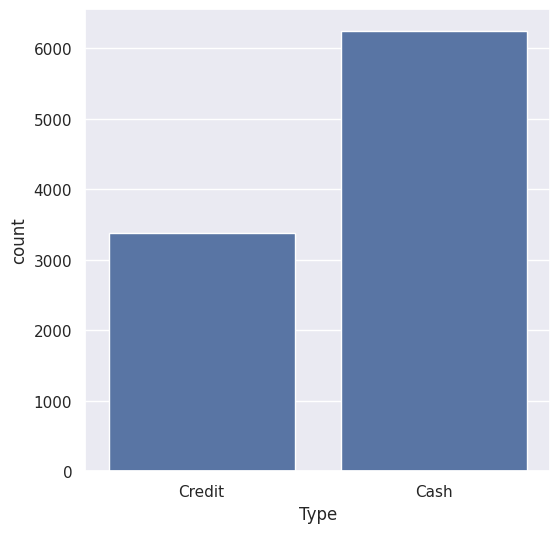

In [297]:
# Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Type', data=machine_data)
plt.show()

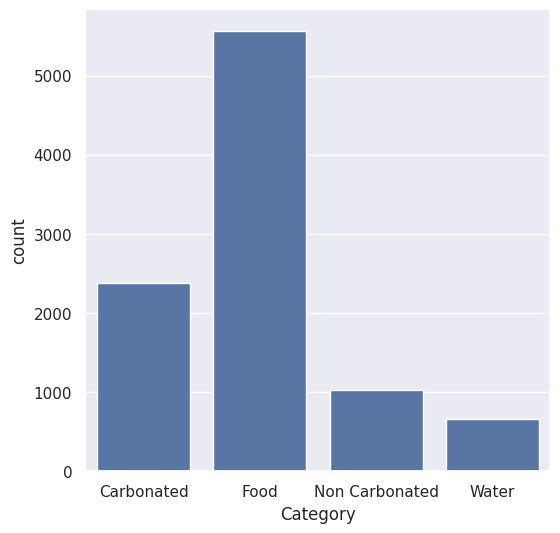

In [298]:
# CategoryType column
plt.figure(figsize=(6,6))
sns.countplot(x='Category', data=machine_data)
plt.show()

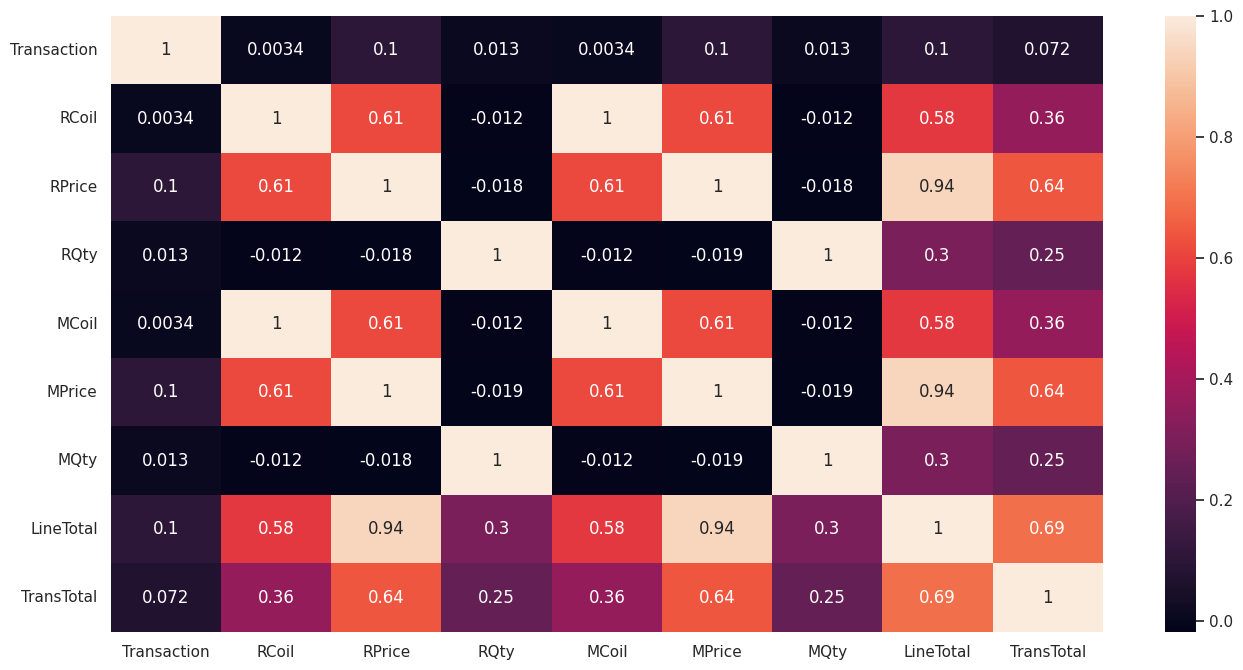

In [299]:
plt.figure(figsize=(16, 8))
sns.heatmap(machine_data.select_dtypes(include=['int', 'float']).corr(), annot=True)
plt.show()

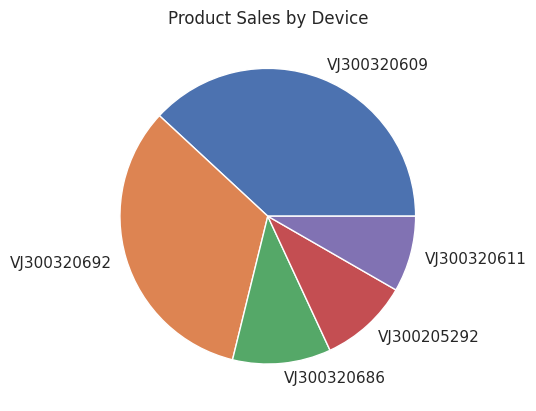

In [300]:
grouped = machine_data.groupby(['Device ID','Product']).size().reset_index(name='counts')
grouped = grouped.groupby('Device ID')['counts'].sum().reset_index(name='total')
grouped = grouped.sort_values('total',ascending=False)
plt.pie(grouped['total'], labels=grouped['Device ID'])
plt.title('Product Sales by Device')
plt.show()

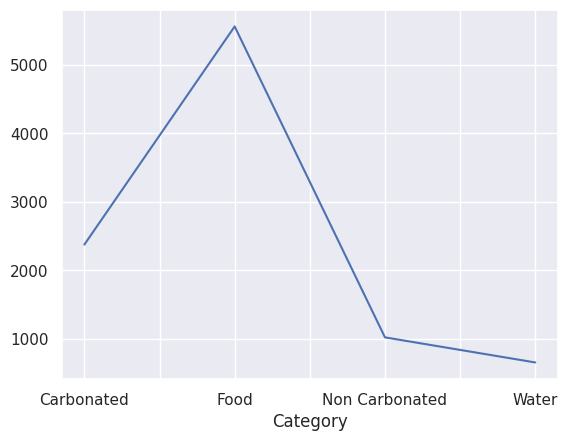

In [301]:
machine_data['Category'].value_counts().sort_index().plot();

Data Pre-Processing


In [302]:
machine_data.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


Label Encoding

In [303]:
encoder = LabelEncoder()

In [304]:
machine_data['Type'] = encoder.fit_transform(machine_data['Type'])

machine_data['Status'] = encoder.fit_transform(machine_data['Status'])

machine_data['Location'] = encoder.fit_transform(machine_data['Location'])

machine_data['Machine'] = encoder.fit_transform(machine_data['Machine'])

machine_data['Product'] = encoder.fit_transform(machine_data['Product'])

machine_data['Category'] = encoder.fit_transform(machine_data['Category'])

machine_data['Device ID'] = encoder.fit_transform(machine_data['Device ID'])

machine_data['TransDate'] = encoder.fit_transform(machine_data['TransDate'])

machine_data['Prcd Date'] = encoder.fit_transform(machine_data['Prcd Date'])



In [305]:
machine_data.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,0,2,0,1,130,0,14515778905,0,1,148,3.5,1,148,3.5,1,3.5,3.5,0
1,0,2,0,1,130,0,14516018629,0,1,148,3.5,1,148,3.5,1,3.5,5.0,0
2,0,2,0,1,171,1,14516018629,0,1,123,1.5,1,123,1.5,1,1.5,5.0,0
3,0,2,0,1,171,1,14516020373,0,1,123,1.5,1,123,1.5,1,1.5,1.5,0
4,0,2,0,1,130,0,14516021756,0,1,148,3.5,1,148,3.5,1,3.5,3.5,0


Splitting features and Target

In [306]:
X = machine_data.drop(columns='TransTotal', axis=1)
Y = machine_data['TransTotal']

In [307]:
print(X)

      Status  Device ID  Location  Machine  Product  Category  Transaction  \
0          0          2         0        1      130         0  14515778905   
1          0          2         0        1      130         0  14516018629   
2          0          2         0        1      171         1  14516018629   
3          0          2         0        1      171         1  14516020373   
4          0          2         0        1      130         0  14516021756   
...      ...        ...       ...      ...      ...       ...          ...   
9612       0          1         3        4       44         1  16175373362   
9613       0          2         0        1      108         3  16176802941   
9614       0          0         0        0      135         1  16176909481   
9615       0          2         0        1      108         3  16176914301   
9616       0          0         0        0       40         0  16177325723   

      TransDate  Type  RCoil  RPrice  RQty  MCoil  MPrice  MQty

In [308]:
print(Y)

0       3.5
1       5.0
2       5.0
3       1.5
4       3.5
       ... 
9612    1.5
9613    1.5
9614    2.0
9615    1.5
9616    1.5
Name: TransTotal, Length: 9617, dtype: float64


Splitting the data into Training data & Testing Data

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [310]:
print(X.shape, X_train.shape, X_test.shape)

(9617, 17) (7693, 17) (1924, 17)


ML model

In [311]:
regressor = XGBRegressor()

In [312]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [313]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [314]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [315]:
print('R Squared value = ', r2_train)

R Squared value =  0.8787217445125175


In [316]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [317]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [318]:
print('R Squared value = ', r2_test)

R Squared value =  0.6479688370742971


KNN

In [319]:
df = machine_data.drop(['Status', 'Device ID', 'Location', 'Machine',
              'Product', 'Category',
              'TransDate', 'Type','Prcd Date'], axis = 1)
df.head()

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
0,14515778905,148,3.5,1,148,3.5,1,3.5,3.5
1,14516018629,148,3.5,1,148,3.5,1,3.5,5.0
2,14516018629,123,1.5,1,123,1.5,1,1.5,5.0
3,14516020373,123,1.5,1,123,1.5,1,1.5,1.5
4,14516021756,148,3.5,1,148,3.5,1,3.5,3.5


In [320]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['MQty'], axis=1)

In [321]:
X.head()

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,LineTotal,TransTotal
0,14515778905,148,3.5,1,148,3.5,3.5,3.5
1,14516018629,148,3.5,1,148,3.5,3.5,5.0
2,14516018629,123,1.5,1,123,1.5,1.5,5.0
3,14516020373,123,1.5,1,123,1.5,1.5,1.5
4,14516021756,148,3.5,1,148,3.5,3.5,3.5


In [322]:
X.shape

(9617, 8)

In [323]:
# Putting response variable to y
y = df['MQty']

In [324]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: MQty, dtype: int64

In [325]:
y.shape

(9617,)

In [326]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=125)

In [327]:
X_train.head()

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,LineTotal,TransTotal
3894,15270224621,144,1.5,1,144,1.5,1.5,1.5
6934,15685818782,123,2.0,1,123,2.0,2.0,4.0
6181,15568345952,131,1.5,1,131,1.5,1.5,5.5
4264,15319167631,145,2.5,1,145,2.5,2.5,2.5
7622,15812413505,138,2.0,1,138,2.0,2.0,2.0


In [328]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()

In [329]:
# fit the model with the training data
model.fit(X_train,y_train)

KNeighborsClassifier()

In [330]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([1, 1, 1, ..., 1, 1, 1])

In [331]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9872232952013074
